# Netflix Content Analysis

This analysis investigates how the distribution of Netflix titles has evolved over time and how content varies by rating

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../netflix_titles.csv')

# Display the first few rows and the data dictionary (schema)
print("Data Dictionary:")
print("- type: Category of content (Movie/TV Show)")
print("- release_year: Year the title was originally released")
print("- rating: Age certification")
print("- duration: Length of the title")
df.head()

Data Dictionary:
- type: Category of content (Movie/TV Show)
- release_year: Year the title was originally released
- rating: Age certification
- duration: Length of the title


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
def clean_netflix_dates(date_str):
    if pd.isna(date_str) or not isinstance(date_str, str):
        return None
    try:
        # Extract the last 4 characters which represent the year
        return int(date_str.strip()[-4:])
    except:
        return None

# Apply the custom function
df['year_added_numeric'] = df['date_added'].apply(clean_netflix_dates)

# Basic cleaning: remove rows with missing critical values for our analysis
df_clean = df.dropna(subset=['year_added_numeric', 'rating']).copy()

In [3]:
# Grouped summary: Count titles by year added
titles_per_year = df_clean['year_added_numeric'].value_counts().sort_index()
print("Titles added per year (Last 5 years):")
print(titles_per_year.tail())

Titles added per year (Last 5 years):
year_added_numeric
2017.0    1186
2018.0    1648
2019.0    2016
2020.0    1879
2021.0    1498
Name: count, dtype: int64


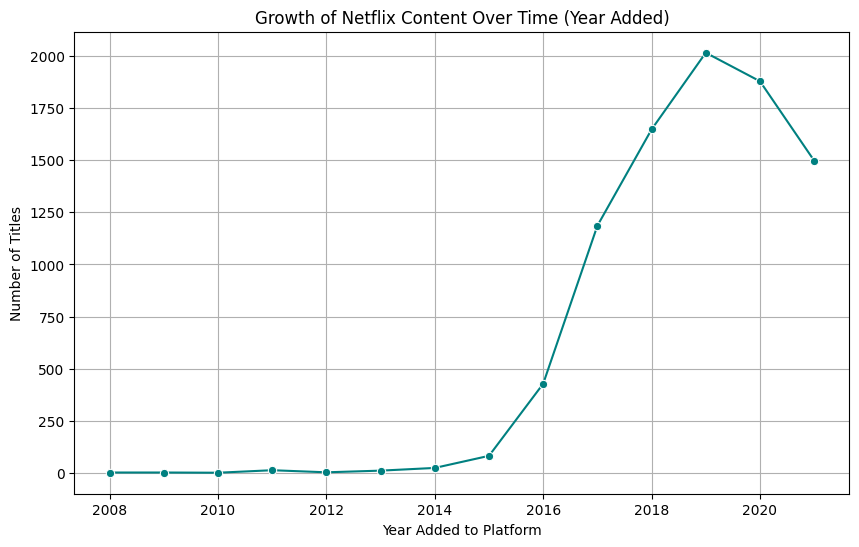

In [4]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=titles_per_year.index, y=titles_per_year.values, marker='o', color='teal')
plt.title('Growth of Netflix Content Over Time (Year Added)')
plt.xlabel('Year Added to Platform')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

This line chart illustrates the relationship between the year content was added and the total volume of titles available on the platform. There is a sharp upward trend starting around 2014 and peaking in 2019, which suggests a significant period of aggressive content acquisition and production. The slight dip in 2020 and 2021 may reflect external factors such as global production delays during that timeframe.

In [5]:
# Grouped summary: Comparing content types (Movie vs TV Show)
type_counts = df_clean['type'].value_counts()
print(type_counts)

type
Movie      6129
TV Show    2664
Name: count, dtype: int64


C:\Users\treys\AppData\Local\Temp\ipykernel_24708\557438326.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='rating', order=df_clean['rating'].value_counts().index, palette='viridis')


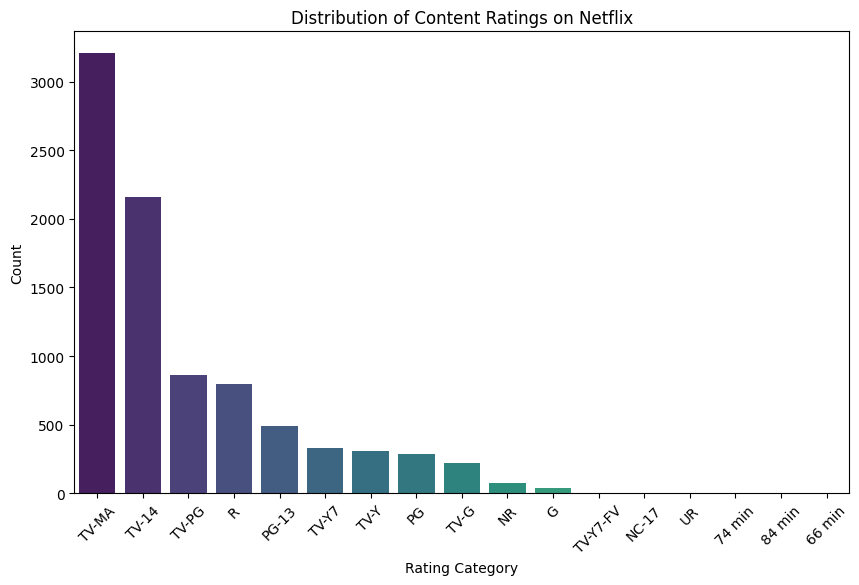

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='rating', order=df_clean['rating'].value_counts().index, palette='viridis')
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

This bar chart displays the frequency of various age certifications across the entire Netflix library. The data shows that TV-MA is the most common rating by a wide margin, indicating that the majority of Netflix's content is targeted toward adult audiences. Other ratings like TV-14 and TV-PG also represent a significant portion of the catalog, showing a diverse but mature-leaning distribution.